In [1]:
# загружаем библиотеки
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from comet_ml import Experiment

%matplotlib inline

In [3]:
# загружаем данные
df = pd.read_csv('data/KaggleV2-May-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
# отбираем признаки для анализа
numeric_data = df.copy()
numeric_data.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 
                        'AppointmentDay', 'No-show', 'Gender', 
                        'Neighbourhood'], axis=1, inplace = True)

In [5]:
# Создаём эксперимент
experiment = Experiment(
    api_key="BQoNTjYYIlDSvFRHwqQrDpLPE",
    project_name="medical-appointment",
    workspace="alzmej",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/alzmej/medical-appointment/685c224df5eb4bbfb430da2aee92fa55



{'web': 'https://www.comet.com/api/image/download?imageId=d6fe86c71ba141aeac26e82d0038e4e9&experimentKey=685c224df5eb4bbfb430da2aee92fa55',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=d6fe86c71ba141aeac26e82d0038e4e9&experimentKey=685c224df5eb4bbfb430da2aee92fa55',
 'imageId': 'd6fe86c71ba141aeac26e82d0038e4e9'}

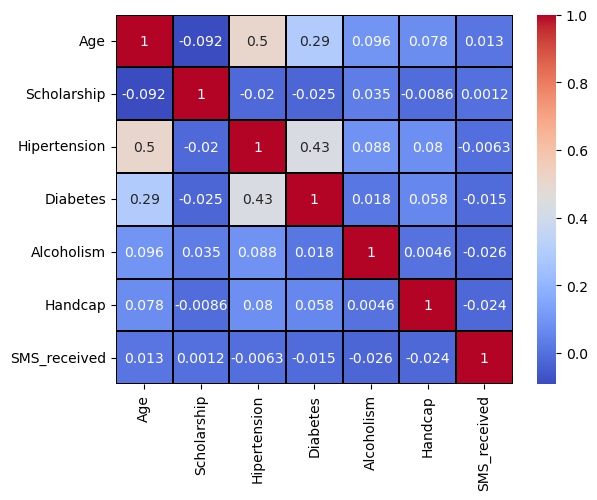

In [6]:
# строим тепловую карту
sns.heatmap(numeric_data.corr(), 
            annot = True, 
            fmt='.2g', 
            cmap = 'coolwarm', 
            linewidths = 0.1, 
            linecolor = 'black'
           );
#логируем тепловую карту
experiment.log_figure(figure=plt)

In [7]:
#отображаем эксперимент
experiment.display()

In [8]:
# завершаем эксперемент
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/alzmej/medical-appointment/685c224df5eb4bbfb430da2aee92fa55
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     figures                      : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages                  : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
C